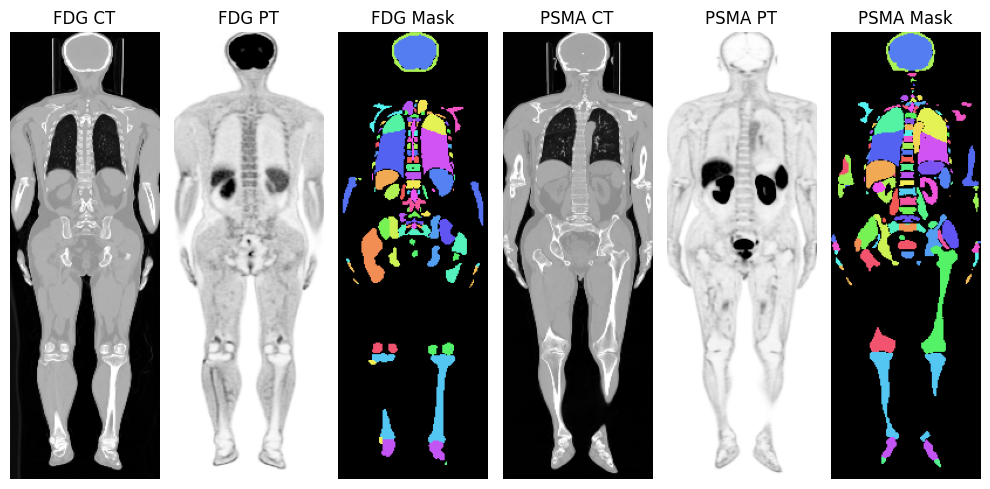

In [2]:
import sys
import os
sys.path.append(os.path.abspath('..'))

import h5py
import torch
import matplotlib.pyplot as plt

import colorsys
from General.segments import SEGMENT_INDEX
from matplotlib.colors import ListedColormap
import numpy as np

def build_label_colormap(n_labels, background=(0, 0, 0)):
    """
    n_labels: max label index (inclusive)
    background: RGB in range [0,1]
    """
    colors = np.zeros((n_labels + 1, 3))
    colors[0] = background  # background = black

    golden_ratio = 0.61803398875
    h = 0.0

    for i in range(1, n_labels + 1):
        h = (h + golden_ratio) % 1
        s = 0.65
        v = 0.95
        colors[i] = colorsys.hsv_to_rgb(h, s, v)

    return ListedColormap(colors)


cmap = build_label_colormap(max(SEGMENT_INDEX.values()))



def load_h5(file_name: str):
    """
    Returns:
        fdg_ct, fdg_pt, fdg_mask,
        psma_ct, psma_pt, psma_mask
    """

    with h5py.File(file_name, 'r') as h5_file:
        fdg_ct = torch.from_numpy(h5_file['fdg_ct'][:])
        fdg_pt = torch.from_numpy(h5_file['fdg_pt'][:])
        fdg_mask = torch.from_numpy(h5_file['fdg_mask'][:])

        psma_ct = torch.from_numpy(h5_file['psma_ct'][:])
        psma_pt = torch.from_numpy(h5_file['psma_pt'][:])
        psma_mask = torch.from_numpy(h5_file['psma_mask'][:])

    return (
        fdg_ct,
        fdg_pt,
        fdg_mask,
        psma_ct,
        psma_pt,
        psma_mask,
    )


file = r"C:\Projects\differentHPs\patient_0002.h5"


fdg_ct, fdg_pt, fdg_mask, psma_ct, psma_pt, psma_mask = load_h5(file)


import matplotlib.pyplot as plt
import numpy as np

# Assuming fdg_ct, fdg_pt, fdg_mask, psma_ct, psma_pt, psma_mask are already defined and loaded properly

slice_idx = 80

# Rotate slices by 90 degrees
fdg_ct_rotated = np.rot90(fdg_ct[0, :, slice_idx, :])
fdg_pt_rotated = np.rot90(fdg_pt[0, :, slice_idx, :])
fdg_mask_rotated = np.rot90(fdg_mask[0, :, slice_idx, :])

psma_ct_rotated = np.rot90(psma_ct[0, :, slice_idx, :])
psma_pt_rotated = np.rot90(psma_pt[0, :, slice_idx, :])
psma_mask_rotated = np.rot90(psma_mask[0, :, slice_idx, :])

# Create a figure with 1 row and 6 columns
fig, axes = plt.subplots(1, 6, figsize=(10, 5))

# FDG
axes[0].imshow(fdg_ct_rotated, cmap='gray')
axes[0].set_title('FDG CT')

axes[1].imshow(fdg_pt_rotated, cmap='gray_r')
axes[1].set_title('FDG PT')

axes[2].imshow(fdg_mask_rotated, cmap=cmap)
axes[2].set_title('FDG Mask')

# PSMA
axes[3].imshow(psma_ct_rotated, cmap='gray')
axes[3].set_title('PSMA CT')

axes[4].imshow(psma_pt_rotated, cmap='gray_r')
axes[4].set_title('PSMA PT')

axes[5].imshow(psma_mask_rotated, cmap=cmap)
axes[5].set_title('PSMA Mask')

# Remove axes
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()